In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline 

In [2]:
x_data = np.linspace(0.0,10,1000000)
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [3]:
noise = np.random.rand(len(x_data))
noise

array([ 0.77215328,  0.81470239,  0.84308578, ...,  0.6537537 ,
        0.31949301,  0.23091934])

y = mx + b


b = 5

In [4]:
y_true = (0.5)*x_data + 5 + noise
y_true

array([  5.77215328,   5.81470739,   5.84309578, ...,  10.6537437 ,
        10.31948801,  10.23091934])

In [5]:
x_df = pd.DataFrame(x_data,columns=['X Data'])
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [6]:
y_df = pd.DataFrame(y_true,columns=['Y'])
y_df.head()

,Y
0,5.772153
1,5.814707
2,5.843096
3,5.348585
4,5.581670


In [7]:
my_data = pd.concat([x_df,y_df],axis=1)
my_data.head()

,X Data,Y
0,0.00000,5.772153
1,0.00001,5.814707
2,0.00002,5.843096
3,0.00003,5.348585
4,0.00004,5.581670


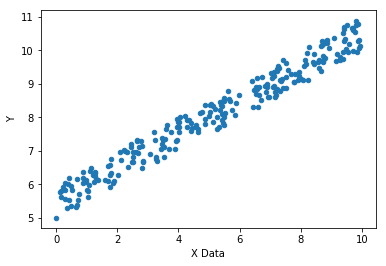

In [8]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

In [30]:
batch_size = 8

In [36]:
np.random.rand(2)

array([ 0.52521779,  0.28186361])

In [37]:
m = tf.Variable(0.52)
b = tf.Variable(0.28)

In [38]:
xph = tf.placeholder(tf.float32,[batch_size])

In [39]:
yph = tf.placeholder(tf.float32,[batch_size])

In [46]:
y_model = m * xph + b

In [47]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [86]:
optimizer = tf.train.GradientDescentOptimizer(0.001)

In [87]:
train = optimizer.minimize(error)

In [88]:
init = tf.global_variables_initializer()

In [89]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    
    # perform batches number of iterations
    for i in range(batches):
        
        # pick randomly batch_size number of integers and store it as an index.
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        # prepare the values for the feed dict that'll be used to minimize loss.
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        #minimize the error for batch_size number of elements, iterating batches number of times
        sess.run(train,feed_dict=feed)
    
    # get the optimized slope and intercept
    model_m , model_b = sess.run([m,b])

In [90]:
model_m , model_b

(0.51712888, 5.397438)

In [91]:
y_hat = model_m*x_data+model_b

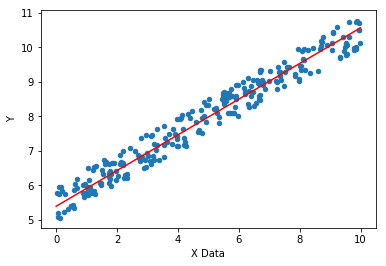

In [94]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(x_data,y_hat,'r')

# Using TF Estimator

In [97]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [99]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3bi__o7o', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [100]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_data,y_true,test_size = 0.3, random_state=101)

In [102]:
len(X_train),len(X_test)

(700000, 300000)

In [103]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [104]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [106]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [107]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp3bi__o7o/model.ckpt.
INFO:tensorflow:loss = 643.586, step = 1
INFO:tensorflow:global_step/sec: 555.702
INFO:tensorflow:loss = 29.9597, step = 101 (0.182 sec)
INFO:tensorflow:global_step/sec: 726.285
INFO:tensorflow:loss = 10.467, step = 201 (0.137 sec)
INFO:tensorflow:global_step/sec: 734.978
INFO:tensorflow:loss = 11.0663, step = 301 (0.139 sec)
INFO:tensorflow:global_step/sec: 690.487
INFO:tensorflow:loss = 10.378, step = 401 (0.142 sec)
INFO:tensorflow:global_step/sec: 574.023
INFO:tensorflow:loss = 5.04074, step = 501 (0.177 sec)
INFO:tensorflow:global_step/sec: 751.692
INFO:tensorflow:loss = 3.45666, step = 601 (0.130 sec)
INFO:tensorflow:global_step/sec: 652.832
INFO:tensorflow:loss = 3.61538, step = 701 (0.153 sec)
INFO:tensorflow:global_step/sec: 767.333
INFO:tensorflow:loss = 3.07541, step = 801 (0.130 sec)
INFO:tensorflow:global_step/sec: 637.474
INFO:tensorflow:loss = 2.03459, s

In [ ]:
train_metrics = estimator.evaluate()